<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Demo-of-EDA-Functions" data-toc-modified-id="Demo-of-EDA-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demo of EDA Functions</a></span><ul class="toc-item"><li><span><a href="#DataFrame-Values" data-toc-modified-id="DataFrame-Values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DataFrame Values</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distributions</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Cumulative-Sums-/-Counts" data-toc-modified-id="Cumulative-Sums-/-Counts-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Cumulative Sums / Counts</a></span></li></ul></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.EDA as EDA

## Load Data

In [6]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                 )

df["target_num"] = np.where(df["target_event"] == "ACTIVE", 1, 0)
df["target_bool"] = df["target_num"].astype("bool")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   car_nr                         1000 non-null   float64
 1   ref_dt                         1000 non-null   object 
 2   target_event                   1000 non-null   object 
 3   NUM_CONSEC_SERVICES            1000 non-null   int64  
 4   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 5   SUM_INVOICE_AMOUNT             1000 non-null   float64
 6   NUM_EVENTS                     1000 non-null   int64  
 7   FIRST_EVT                      1000 non-null   object 
 8   LAST_EVT                       1000 non-null   object 
 9   LAST_MILEAGE                   1000 non-null   float64
 10  MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 11  AVG_DIFF_MNTH                  1000 non-null   int64  
 12  age_mnth                       1000 non-null   in

## Demo of EDA Functions 
### DataFrame Values

In [8]:
EDA.display_distinct_values(df)

,#_distinct_values
Column,
car_nr,999
ref_dt,495
target_event,2
NUM_CONSEC_SERVICES,10
SUM_INVOICE_AMOUNT_IN_SERVICE,47
SUM_INVOICE_AMOUNT,714
NUM_EVENTS,37
FIRST_EVT,727
LAST_EVT,544


In [9]:
EDA.display_value_counts_ptc(df[["target_event", "NUM_CONSEC_SERVICES"]], n_rows=3)

,counts,prop,cum_prop
ACTIVE,710,71.0%,71.0%
CHURN,290,29.0%,100.0%


In [10]:
EDA.display_tail_transposed(df, random_state=None)

(1000, 15)


,590,233,297,288,291
car_nr,1.1e+08,1.1e+08,1.1e+08,1.1e+08,1.1e+08
ref_dt,2017-07-15 00:00:00.0000000,2015-08-07 00:00:00.0000000,2015-10-18 00:00:00.0000000,2017-04-20 00:00:00.0000000,2015-09-27 00:00:00.0000000
target_event,CHURN,ACTIVE,CHURN,ACTIVE,CHURN
NUM_CONSEC_SERVICES,2,4,4,2,1
SUM_INVOICE_AMOUNT_IN_SERVICE,0,0,0,0,0
SUM_INVOICE_AMOUNT,2.5e+03,0,5.2e+02,2.4e+03,5e+03
NUM_EVENTS,16,12,19,13,7
FIRST_EVT,2012-01-19 00:00:00.0000000,2009-09-04 00:00:00.0000000,2008-01-24 00:00:00.0000000,2011-04-21 00:00:00.0000000,2012-03-29 00:00:00.0000000
LAST_EVT,2016-07-12 00:00:00.0000000,2014-06-12 00:00:00.0000000,2014-11-14 00:00:00.0000000,2017-02-02 00:00:00.0000000,2015-01-23 00:00:00.0000000
LAST_MILEAGE,3.7e+04,3.5e+04,9.7e+04,6.8e+04,4.6e+04


### Distributions

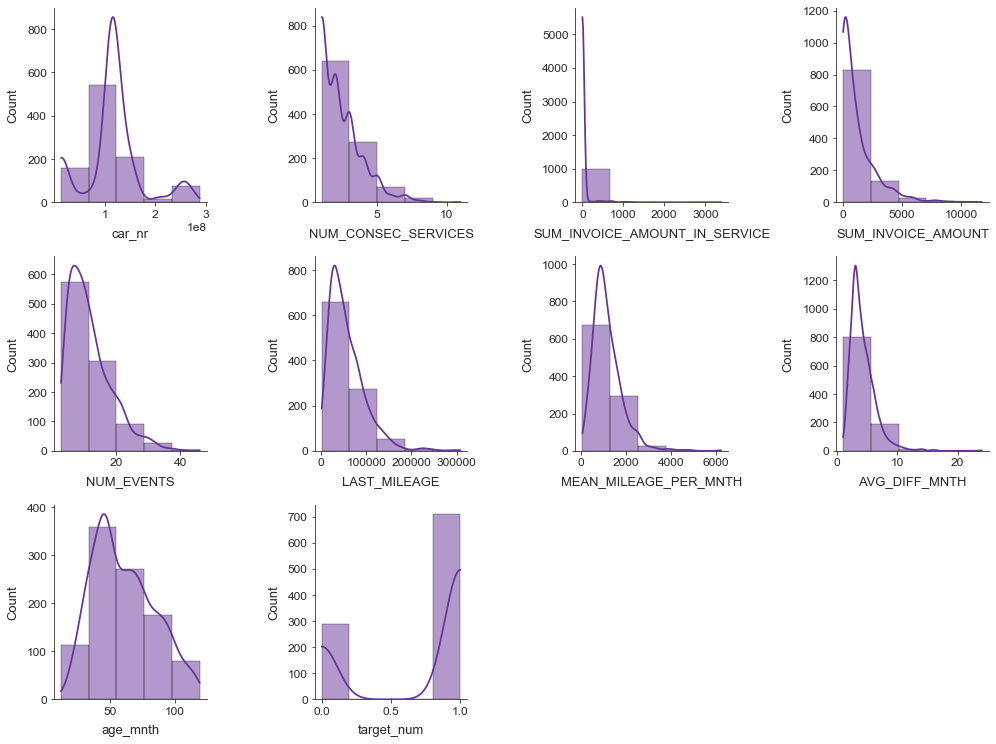

In [11]:
EDA.plot_numeric_histograms(df, bins=5, kde=True)

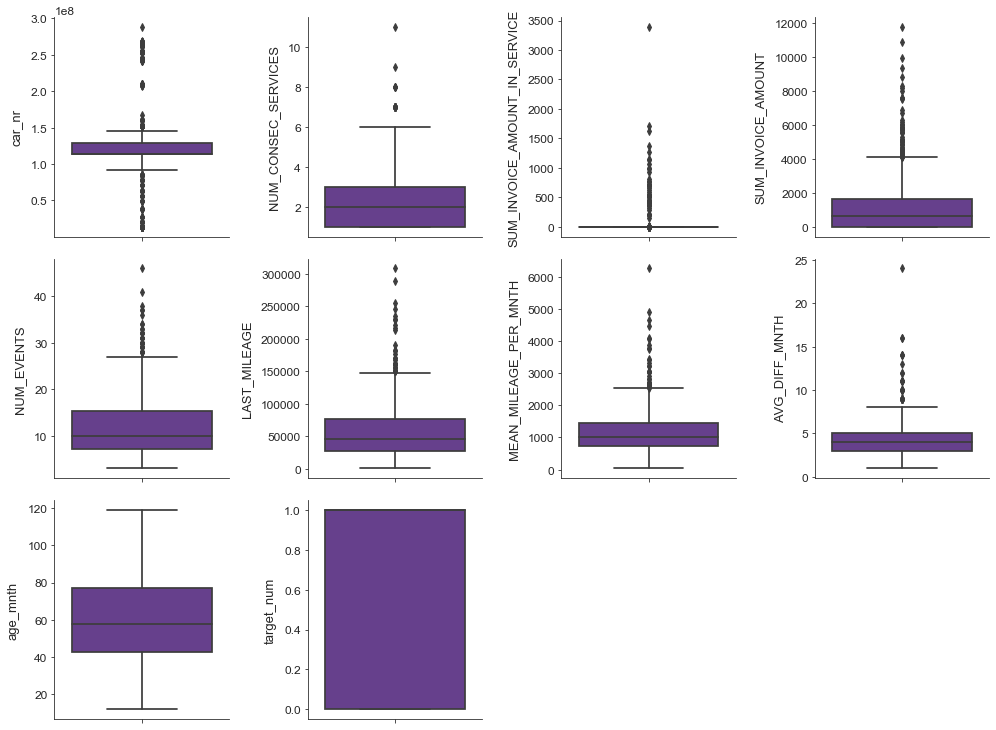

In [12]:
EDA.plot_numeric_boxplots(df)

In [13]:
# Make some columns categorical
df_cat = df.copy()
for col in ["NUM_CONSEC_SERVICES", "target_event", "NUM_EVENTS", "AVG_DIFF_MNTH"]:
    df_cat[col] = df_cat[col].astype("category")

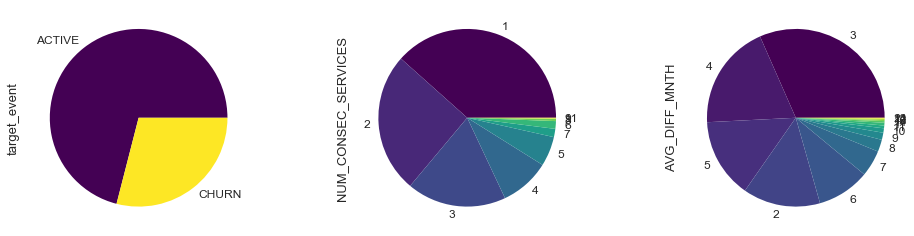

Not plotted: ['NUM_EVENTS']


In [14]:
EDA.plot_categorical_pies(df_cat)

### Correlations

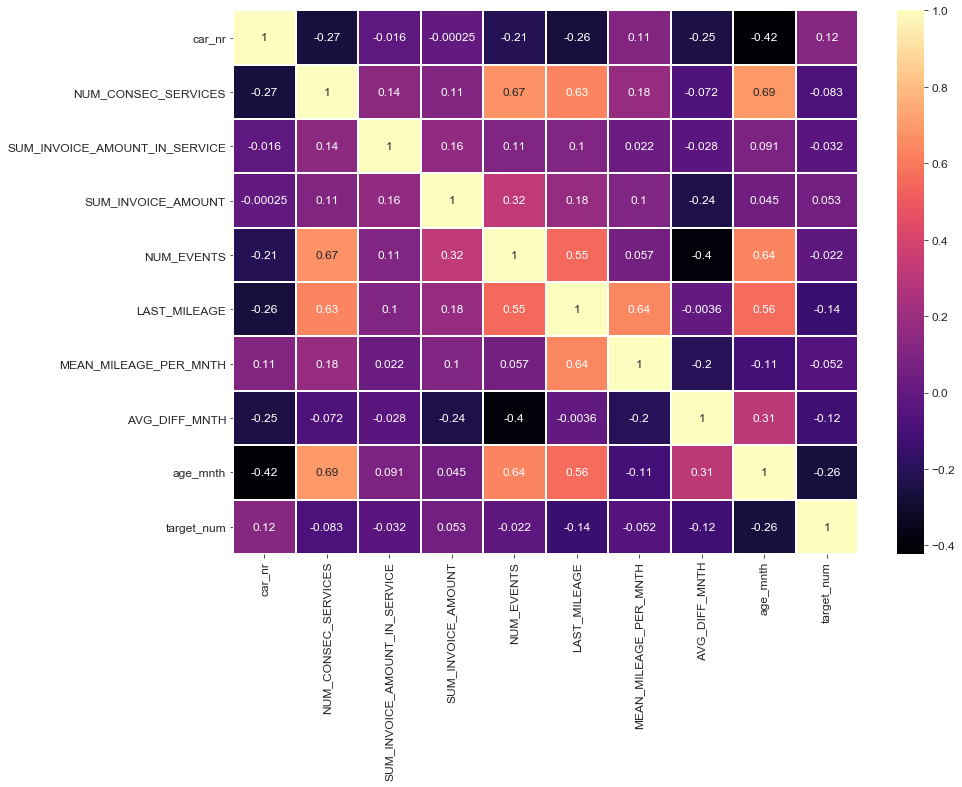

In [15]:
EDA.plot_correlations_full_heatmap(df)

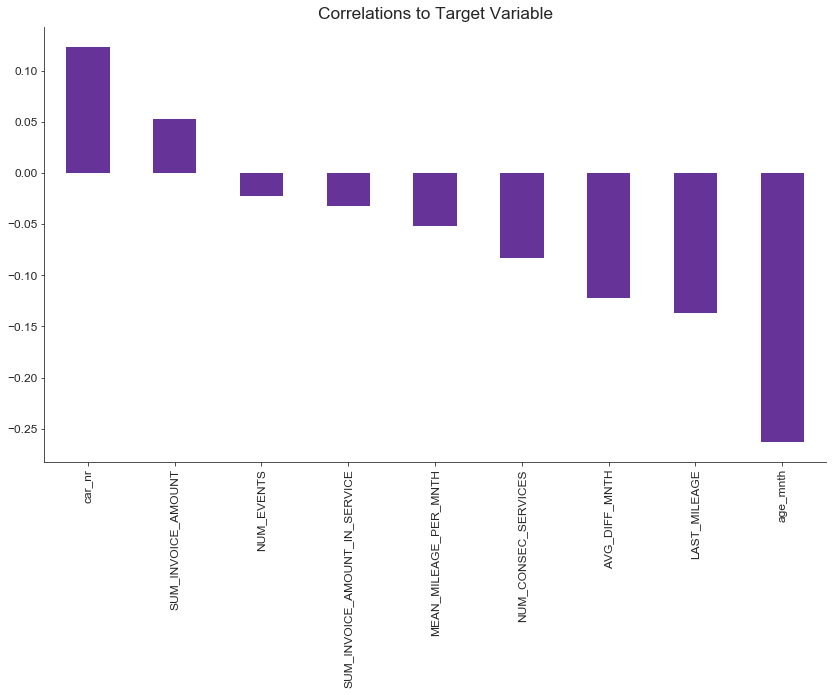

In [16]:
# Numerical features to numerical target
EDA.plot_correlations_numeric_to_target_barchart(df, "target_num")

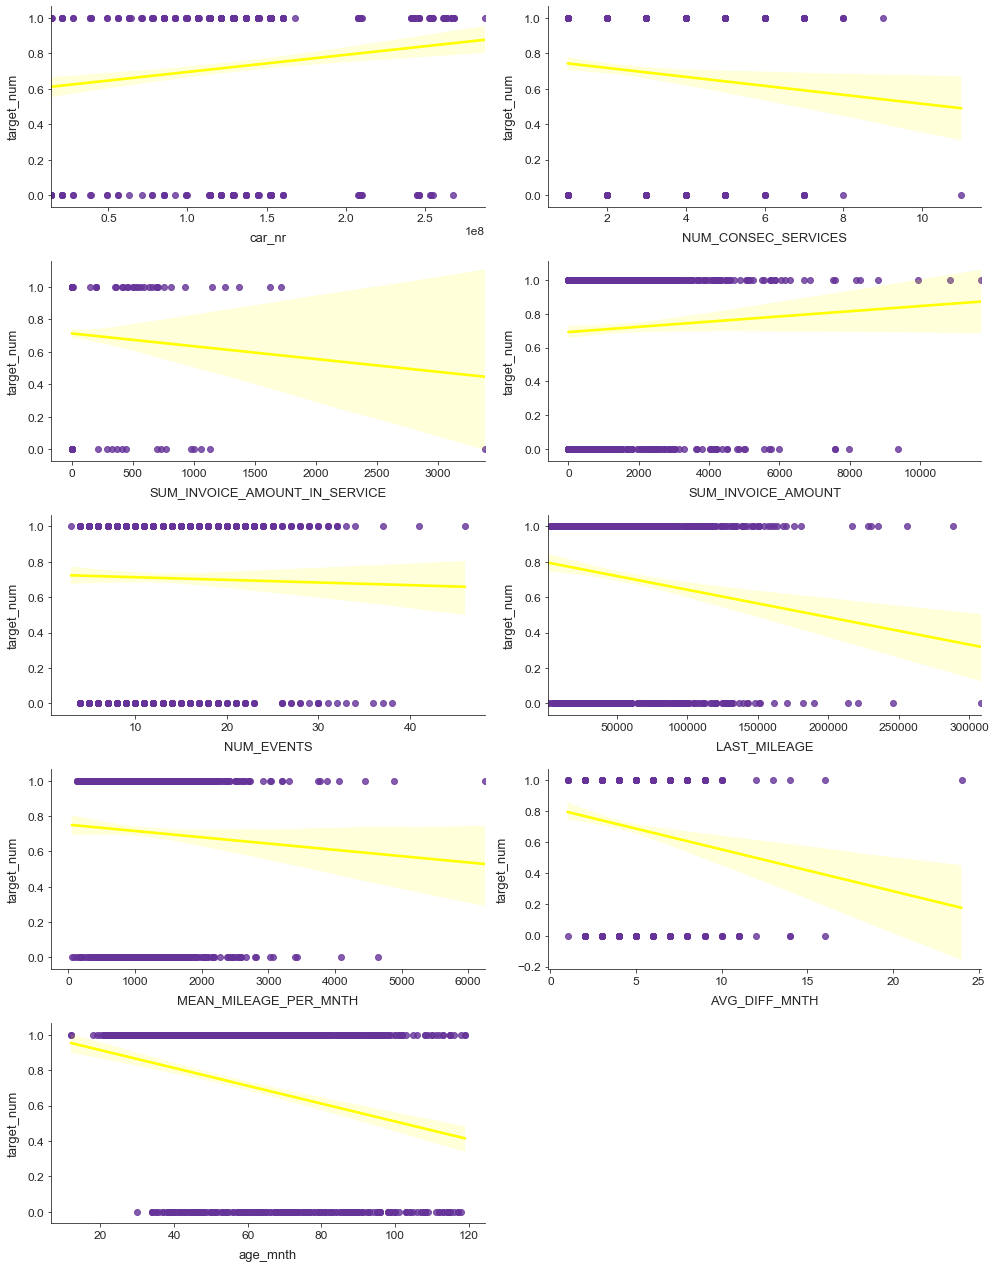

In [17]:
# Numerical features to numerical target
EDA.plot_correlations_numeric_to_target_regressions(df, "target_num")

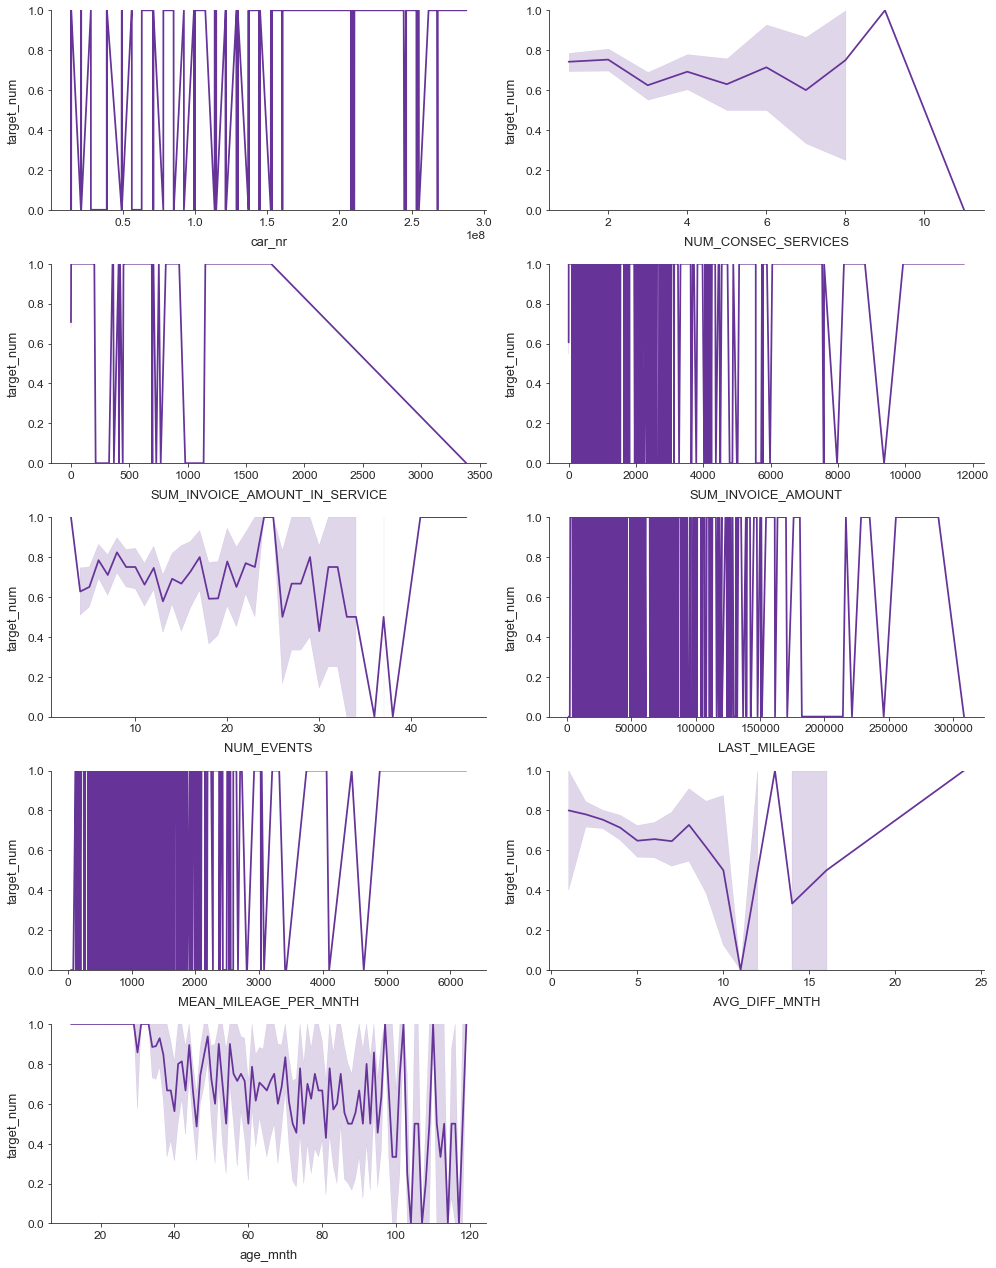

In [18]:
# Numerical features to numerical target
EDA.plot_correlations_numeric_to_target_lineplots(df, "target_num", ylim=(0, 1))

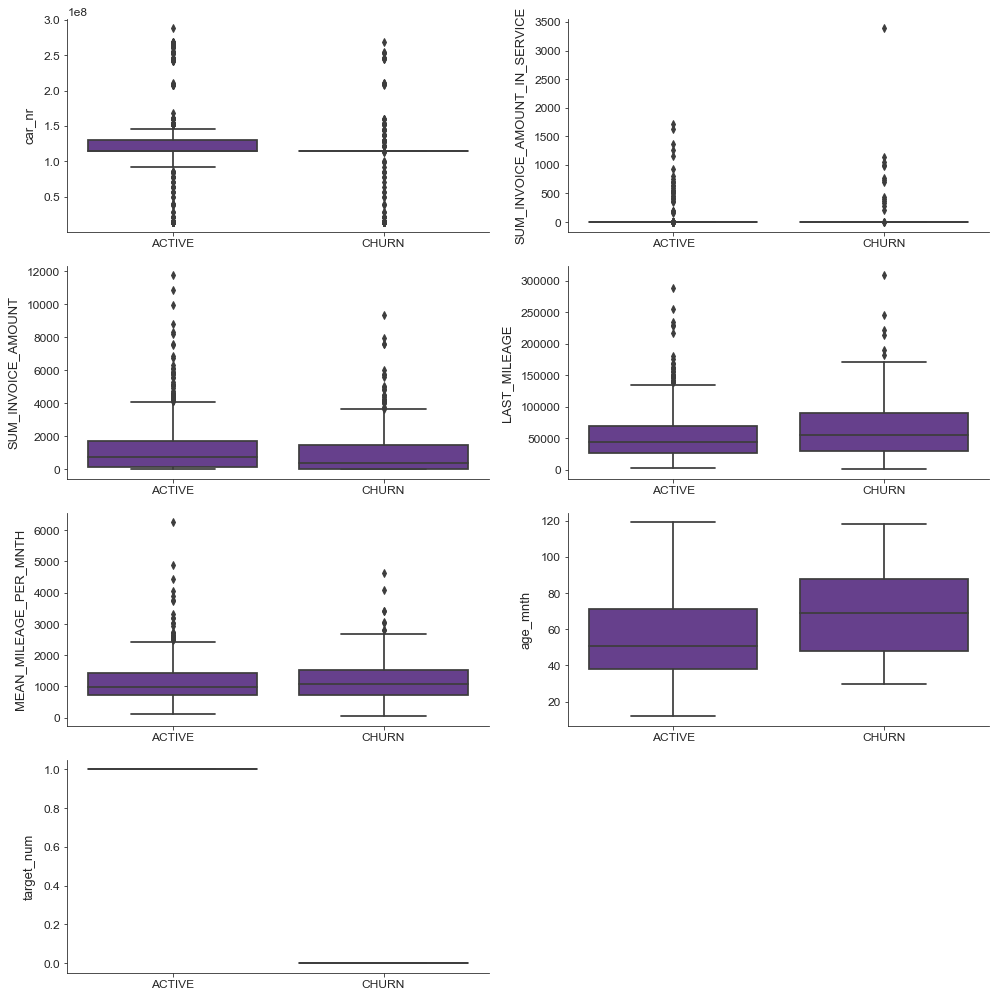

In [19]:
# Numerical features to categorical target (accepts num, bool too)
EDA.plot_correlations_numeric_to_target_boxplots(df_cat, "target_event")

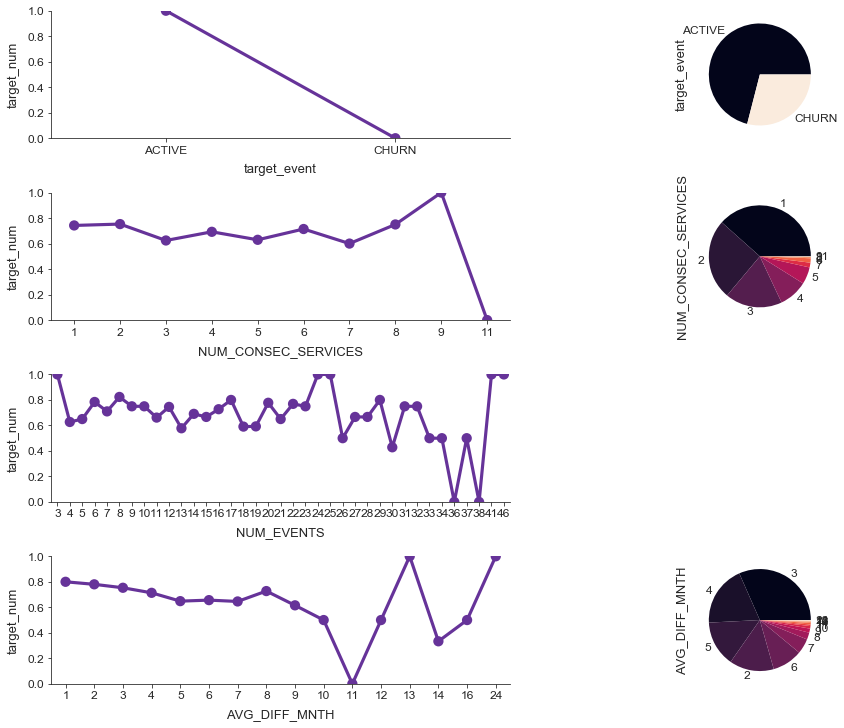

In [20]:
# Categorical features to numerical target
EDA.plot_correlations_numeric_to_target_pointplots_with_pies(df_cat, "target_num")

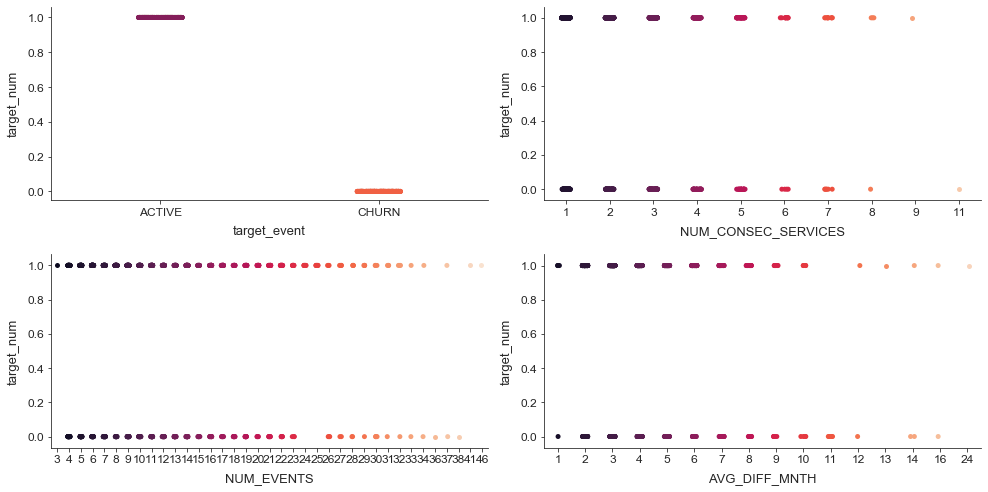

In [21]:
# Categorical features to numerical target
EDA.plot_correlations_categorical_to_target_stripplots(df_cat, "target_num")

### Cumulative Sums / Counts

In [65]:
df["SUM_INVOICE_AMOUNT"] = df["SUM_INVOICE_AMOUNT"].replace(0, np.nan)  # for test purposes

EDA.display_cumcurve_stats(df["SUM_INVOICE_AMOUNT"], np.arange(0.2, 1.2, 0.2))

Attention: 261 instances with missing value not included.


,total_cum_value,lowest_value_in_bin,total_cum_count,total_cum_count_prop
value_threshold,,,,
20%,"236,294.63","4,996.00",35,5.0%
40%,"468,541.38","3,220.80",93,13.0%
60%,"703,825.23","2,207.55",181,24.0%
80%,"937,492.39","1,195.40",322,44.0%
100%,"1,171,104.45",1.00,739,100.0%


Attention: 261 instances with missing value not included.


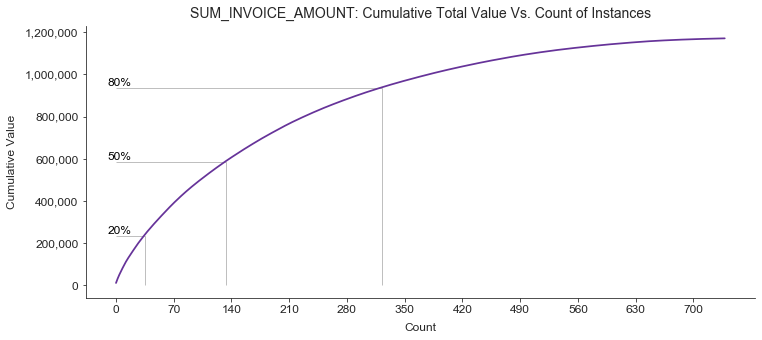

In [66]:
EDA.plot_cumsum_curve(df["SUM_INVOICE_AMOUNT"])

---